In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, GlobalAveragePooling1D, Flatten, Activation, Dropout, BatchNormalization, Input, concatenate, Embedding, LSTM, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.metrics import Precision
from sklearn.model_selection import train_test_split 
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import StandardScaler, LabelEncoder
import sklearn.metrics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import time
import re

In [172]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
from google.colab import drive

In [175]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/хакатон билеты/Tripster.xlsx")

In [177]:
df

,Id,Title,Description
0,44153,Квест-экскурсия «Потерянные во времени» по Тре...,<div><p><strong>Что это за формат?</strong><br...
1,43466,4 города «Золотого кольца» России за 3 дня c т...,<h3>Организационные детали</h3>\n<div><p>Надев...
2,36053,Билет в Третьяковскую галерею,<div><h3>Что вы получите</h3>\n\n\t<ul>\n\t\t<...
3,14003,Классическая обзорная экскурсия по Москве на а...,<div><h3>Что вас ожидает</h3>\n\n\t<p>Во время...
4,11275,Обзорная вечерняя экскурсия по Москве,<div><h3>Что вас ожидает</h3>\n\n\t<ul>\n\t\t<...
5,35591,"Москва-сити: вчера, сегодня, завтра",<div><h3>Что вас ожидает</h3>\n\n\t<p><strong>...
6,22459,Лабиринт улиц и переулков Китай-города,<div><h3>Что вас ожидает</h3>\n\n\t<p><strong>...
7,38804,Москва-Сити: экскурсия с фотографом,<div><h3>Что вас ожидает</h3>\n\n\t<p><strong>...
8,45344,На свидание с Москвой! Экскурсия в мини-группе...,<div><h3>Что вас ожидает</h3>\n\n\t<p><strong>...
9,27682,Секретная Москва: прогулка с фотографом по Кит...,<div><h3>Что вас ожидает</h3>\n\n\t<p><strong>...


In [178]:
print(df.columns.tolist())

['Id', 'Title', 'Description']


In [179]:
df = df.drop('Title', axis=1)

In [180]:
df.reset_index(drop=True, inplace= True)

# **Работаем с таблицой, чистим ее**

In [181]:
df_1 = df.dropna(axis=0, how='all') #удаляем пустые строки и столбцы
df_2 = df_1.dropna(axis=1, how='all')

In [182]:
import re

# Определение регулярного выражения для удаления английских слов
english_words_pattern = re.compile(r'\b\w+[a-zA-Z]+\w*\b')

# Функция для удаления английских слов из текста
def remove_english_words(text):
    return english_words_pattern.sub('', text)

# Применение функции к столбцу "Description" в DataFrame
df_2['Description'] = df_2['Description'].apply(remove_english_words)

In [183]:
def clean_text(text):
    # Очистка текста от специальных символов
    clean_text = re.sub(r'<.*?>', '', text)
    # Удаление символов \n, \t и пробелов в начале и конце строки
    clean_text = clean_text.strip().replace('\n', ',').replace('\t', ',')
    return clean_text

# Применение функции очистки к столбцу 'Description'
df_2['Description'] = df_2['Description'].apply(clean_text)

# Вывод обновленного DataFrame
print(df_2)

       Id                                        Description
0   44153  Что это за формат?,Этот квест вы проходите сам...
1   43466  Организационные детали,Надевайте удобную обувь...
2   36053  Что вы получите,,,,,,Проход без очереди в Трет...
3   14003  Что вас ожидает,,,Во время обзорной поездки на...
4   11275  Что вас ожидает,,,,,,Мы начнем экскурсию с Кра...
5   35591  Что вас ожидает,,,Из прошлого в будущее,На экс...
6   22459  Что вас ожидает,,,Погрузиться прошлое района,В...
7   38804  Что вас ожидает,,,От каменоломни до русского М...
8   45344  Что вас ожидает,,,Нельзя не влюбиться!,В извес...
9   27682  Что вас ожидает,,,Московская хроника в камне,Н...
10  27092  Что вас ожидает,,,Великолепная Абхазия,Мы пока...
11  22752  Что вас ожидает,,,В программе:,,,,,Ахштырское ...
12  32323  Что вас ожидает,,,Удивительный мир природы,Наш...
13  33725  Что вас ожидает,,,Фотопрогулка по лучшим локац...
14  32130  Кому подойдёт поездка,,,Эта экскурсия заинтере...
15  25777  Что вас ожида

In [184]:
df_2['Description'] = df_2['Description'].str.replace(',,,', '')
df_2['Description'] = df_2['Description'].str.replace(',,', '')

In [185]:
text = df_2.loc[4, 'Description']
print(text)

Что вас ожидаетМы начнем экскурсию с Красной площади: вы познакомитесь с ее многовековой историей и главными достопримечательностями, а с Васильевского спуска впечатлитесь великолепным видом на башни Кремля.Проедем мимо Театральной площади с её роскошным Большим театром и ЦУМом.Из окна автобуса полюбуемся набережными и деловым центром Москва-Сити в нарядной вечерней иллюминации.Остановимся у Храма Христа Спасителя, чтобы рассмотреть его с ажурного Патриаршего моста, а также увидеть подсвеченные кремлёвские купола.У комплекса Москва-сити мы сделаем одну из самых ярких остановок в вечернее время. Вы услышите историю небоскребов и сделаете красивые фотоИ, наконец, подниметесь на самую главную московскую смотровую — Площадь на Воробьёвых горах.Организационные детали,Как проходит экскурсияНа новом комфортабельном транспорте: микроавтобусе (до 16 человек) или большом туристическом автобусе (от 16 до 40 человек)Продолжительность остановок — 15-20 минутЭкскурсию для вас проведет один из гидов 

In [74]:
# Сохранение DataFrame в Excel
df_2.to_excel("/content/drive/MyDrive/Colab Notebooks/хакатон билеты/Tripster_2.xlsx", index=False, engine='openpyxl')

Была произведена ручная классификация текстов с использованием ChatGPT. Внизу видно пример классификации, а также пример предложенных "новых" классов для анкеты (для дальнейшего усовершенствования анкеты)

Всего 28 классов (слов-эмоций)
1.	Увидеть достопримечательности
2.	Пляж
3.	Местная культура
4.	Местная кухня
5.	Люкс
6.	История
7.	Вина
8.	Приключения и экстрим
9.	Спа
10.	Сафари
11.	Шоппинг
12.	Экологичное потребление
13.	Коренные народы и традиции
14.	Местное пиво
15.	Спортивные события
16.	Искусство и театр
17.	Музеи
18.	Ночные клубы
19.	Спорт и фитнесс
20.	Романтическое
21.	В поисках чудес
22.	Глухомань
23.	Релакс
24.	Быстрый темп
25.	Премиальное
26.	Духовное
27.	Исследовательское
28.	Экстремальное



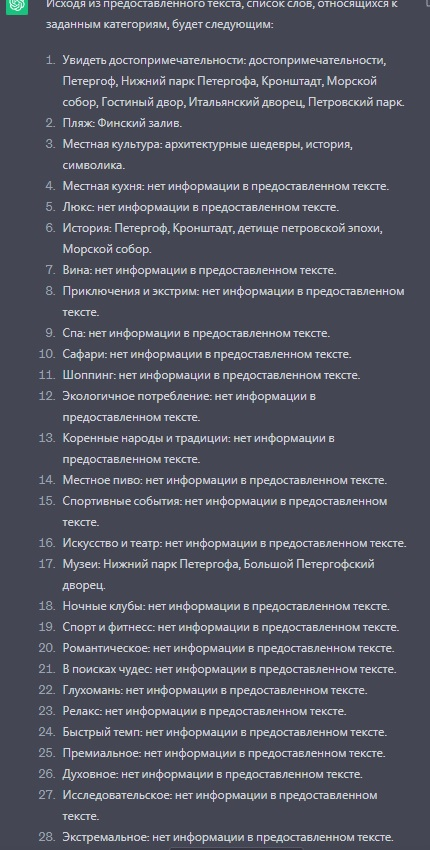

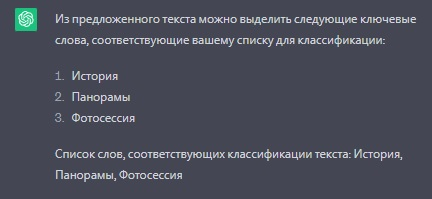

In [193]:
#Загружаем данные после ручной обработки
new_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/хакатон билеты/Tripster_3.xlsx")

In [194]:
new_df = new_df.replace(r'\n', ' ', regex=True)


In [195]:
new_df["class"] = new_df["class"].replace(',', '', regex=True)

In [196]:
new_df

,Id,Description,class
0,44153,"Что это за формат?,Этот квест вы проходите сам...",искусство_и_театр музеи духовное исследователь...
1,36053,Что вы получитеПроход без очереди в Третьяковс...,местная_культура местная_кухня история музеи
2,14003,Что вас ожидаетВо время обзорной поездки на ко...,местная_культура история музеи
3,11275,Что вас ожидаетМы начнем экскурсию с Красной п...,увидеть_достопримечательности история музеи
4,35591,"Что вас ожидаетИз прошлого в будущее,На экскур...",увидеть_достопримечательности история искусств...
5,22459,"Что вас ожидаетПогрузиться прошлое района,В не...",история духовное
6,38804,Что вас ожидаетОт каменоломни до русского Манх...,история исследовательское быстрый_темп
7,45344,"Что вас ожидаетНельзя не влюбиться!,В известно...",история увидеть_достопримечательности
8,27682,"Что вас ожидаетМосковская хроника в камне,Наш ...",история
9,27092,"Что вас ожидаетВеликолепная Абхазия,Мы покажем...",увидеть_достопримечательности история


In [197]:
new_df['class'] = new_df['class'].str.split()

In [198]:
unique_values = set(new_df['class'].explode())
for value in unique_values:
    new_df[value] = new_df['class'].apply(lambda x: int(value in x)).astype(int)

new_df.drop('class', axis=1, inplace=True)

In [199]:
new_df

,Id,Description,спа,приключения_и_экстрим,культура,духовное,пляж,вина,коренные_народы_и_традиции,ночные_клубы,...,музеи,местная_кухня,увидеть_достопримечательности,быстрый_темп,шоппинг,исследовательское,премиальное,спорт_и_фитнес,романтическое,экологичное_потребление
0,44153,"Что это за формат?,Этот квест вы проходите сам...",0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,36053,Что вы получитеПроход без очереди в Третьяковс...,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,14003,Что вас ожидаетВо время обзорной поездки на ко...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,11275,Что вас ожидаетМы начнем экскурсию с Красной п...,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,35591,"Что вас ожидаетИз прошлого в будущее,На экскур...",0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5,22459,"Что вас ожидаетПогрузиться прошлое района,В не...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,38804,Что вас ожидаетОт каменоломни до русского Манх...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7,45344,"Что вас ожидаетНельзя не влюбиться!,В известно...",0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,27682,"Что вас ожидаетМосковская хроника в камне,Наш ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,27092,"Что вас ожидаетВеликолепная Абхазия,Мы покажем...",0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [200]:
column_names = new_df.columns
print(column_names)

Index(['Id', 'Description', 'спа', 'приключения_и_экстрим', 'культура',
       'духовное', 'пляж', 'вина', 'коренные_народы_и_традиции',
       'ночные_клубы', 'в_поисках_чудес', 'релакс', 'местная_культура',
       'история', 'местное_пиво', 'спорт_и_фитнесс', 'экстремальное',
       'глухомань', 'искусство_и_театр', 'музеи', 'местная_кухня',
       'увидеть_достопримечательности', 'быстрый_темп', 'шоппинг',
       'исследовательское', 'премиальное', 'спорт_и_фитнес', 'романтическое',
       'экологичное_потребление'],
      dtype='object')


In [201]:
params = new_df.columns[2:].tolist()

# Создайте столбец "y_train" с векторами из 1 и 0
new_df['y_train'] = new_df[params].apply(lambda row: row.values.tolist(), axis=1)

# Преобразуйте столбец "y_train" в массив numpy
y_train_array = np.array(new_df['y_train'].values.tolist())

print(new_df['y_train'])
print(y_train_array.shape)

0     [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
5     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
6     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
7     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
8     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
9     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
10    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
11    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
12    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...
13    [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, ...
14    [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
15    [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...
16    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
17    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [202]:
len(params)

27

_____________________________________

_________________________________________

In [203]:
import nltk

In [204]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [205]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Загрузка стоп-слов и инициализация лемматизатора
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

# Функция для очистки и лемматизации текста
def clean_and_lemmatize_text(text):
    # Удаление лишних символов и приведение к нижнему регистру
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^а-яА-Я]', ' ', text.lower())
    
    # Токенизация текста на отдельные слова
    words = text.split()
    
    # Удаление стоп-слов и лемматизация слов
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Соединение слов обратно в текст
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Применение функции к столбцу "Description" в DataFrame
new_df['Description'] = new_df['Description'].apply(clean_and_lemmatize_text)

In [206]:
new_df

,Id,Description,спа,приключения_и_экстрим,культура,духовное,пляж,вина,коренные_народы_и_традиции,ночные_клубы,...,местная_кухня,увидеть_достопримечательности,быстрый_темп,шоппинг,исследовательское,премиальное,спорт_и_фитнес,романтическое,экологичное_потребление,y_train
0,44153,это формат квест проходите самостоятельно помо...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."
1,36053,получитепроход очереди третьяковскую галерею и...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
2,14003,ожидаетво время обзорной поездки комфортабельн...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
3,11275,ожидаетмы начнем экскурсию красной площади поз...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,35591,ожидаетиз прошлого будущее экскурсии услышите ...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
5,22459,ожидаетпогрузиться прошлое района неспешном ко...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
6,38804,ожидаетот каменоломни русского манхэттена архи...,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
7,45344,ожидаетнельзя влюбиться известной песне тся на...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
8,27682,ожидаетмосковская хроника камне наш маршрут пр...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
9,27092,ожидаетвеликолепная абхазия покажем самые живо...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [207]:
text = new_df.loc[1, 'Description']
print(text)

получитепроход очереди третьяковскую галерею историческое здание лаврушинском переулке доступ постоянной экспозиции корпуса расположившейся залах двух этажахкак воспользоваться билетомпри бронировании укажите фамилию имя человека которого оформляется заказпри выборе льготного билета уточните льготной категории относится участникпосле бронирования почту придет входной билет распечатайте посещением сохраните электронном видепроход действителен день сеанс указанный билетев выбранный день подходите галерею началу выбранного сеансаобратите внимание билеты подлежат возврату сделать посещение третьяковской галереи интересным осознанным помогут наши экскурсии лучшими гидами организационные детали бронировании льготного билета возьмите собой удостоверение личности документы подтверждающие льготувремя прохода музей вт ср вс чт пт сб праздничные дни каникулы входе посетителей интернет билетами могут образовываться небольшие очереди около минут планируйте свое время заранеелаврушинский переулок яв

таким образом текст описания был очищен слова были приведены к основной форме, убран весь мусор, оставлен только нижний регистр


# **Используем Bag of Words**

In [208]:
from sklearn.feature_extraction.text import CountVectorizer

# Создание экземпляра CountVectorizer
vectorizer = CountVectorizer()

# Преобразование текстовых данных в матрицу мешка слов
bag_of_words_matrix = vectorizer.fit_transform(new_df['Description'])

# Получение списка слов из словаря
words_list = list(vectorizer.vocabulary_.keys())

# Вывод матрицы мешка слов
print(bag_of_words_matrix.toarray())

# Вывод списка слов
print(words_list)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['это', 'формат', 'квест', 'проходите', 'самостоятельно', 'помощью', 'виртуального', 'ведущего', 'такая', 'механика', 'позволит', 'вашей', 'семье', 'изучить', 'шедевры', 'комфортном', 'темпе', 'удобное', 'время', 'толпы', 'главное', 'поможет', 'заинтересовать', 'юных', 'исследователей', 'увлечь', 'часа', 'авторский', 'разработан', 'мной', 'дипломированным', 'гидом', 'влюбл', 'нным', 'сво', 'дело', 'приходите', 'третьяковскую', 'галерею', 'отправляете', 'кодовое', 'слово', 'виртуальному', 'ведущему', 'вс', 'устроено', 'платформу', 'вконтакте', 'игра', 'начинается', 'будем', 'присылать', 'задания', 'загадки', 'головоломки', 'тайные', 'шифры', 'также', 'направлять', 'маршруту', 'ребятам', 'предстоит', 'искать', 'детали', 'картинах', 'сравнивать', 'работы', 'художников', 'угадывать', 'персонажей', 'оживлять', 'полотна', 'какие', 'картины', 'увидите', 'кратко', 'познакомит

In [255]:
joblib.dump(vectorizer, "/content/drive/MyDrive/Colab Notebooks/хакатон билеты/2 вариант трипстер/vectorizer.pkl")

['/content/drive/MyDrive/Colab Notebooks/хакатон билеты/2 вариант трипстер/vectorizer.pkl']

# **Показалось интересным использовать кластеризацию, но после экспериментов отказался от этой идеи**

In [30]:
#from sklearn.cluster import KMeans

# Создание экземпляра K-means с указанием количества кластеров
#num_clusters = 25
#kmeans = KMeans(n_clusters=num_clusters)

# Кластеризация матрицы мешка слов
#clusters = kmeans.fit_predict(bag_of_words_matrix)

# Вывод результата кластеризации
#for i in range(num_clusters):
    #cluster_samples = df_2['Description'][clusters == i]
    #print(f"Cluster {i+1} samples:")
    #print(cluster_samples)
    #print()

Cluster 1 samples:
24    ожидает окрестностях владимирской станции метр...
Name: Description, dtype: object

Cluster 2 samples:
5    ожидает прошлого будущее экскурсии услышите то...
Name: Description, dtype: object

Cluster 3 samples:
13    ожидает фотопрогулка лучшим локациям сочи наш ...
Name: Description, dtype: object

Cluster 4 samples:
15    ожидает открытки абхазии наше путешествие стро...
Name: Description, dtype: object

Cluster 5 samples:
23    ожидает блеск роскошь русского версаля петербу...
Name: Description, dtype: object

Cluster 6 samples:
11    ожидает программе ахштырское ущелье каньон сфо...
Name: Description, dtype: object

Cluster 7 samples:
16    ожидает знаменитые гагры проехав границу скоро...
Name: Description, dtype: object

Cluster 8 samples:
1     организационные детали надевайте удобную обувь...
4     ожидает начнем экскурсию красной площади позна...
6     ожидает погрузиться прошлое района неспешном к...
7     ожидает каменоломни русского манхэттена архит

# **Пробуем RandomForestClassifier**

In [226]:
y_train=y_train_array

In [227]:
X_train=bag_of_words_matrix

In [228]:
X_train.shape

(36, 3714)

In [229]:
y_train.shape

(36, 27)

In [232]:
#X_train, X_test, y_train, y_test = train_test_split(bag_of_words_matrix, y_train_array, test_size=0.1, random_state=42)

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создание экземпляра модели
model = RandomForestClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на обучающем наборе
y_train_pred = model.predict(X_train)

# Оценка точности модели
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Точность на обучающем наборе:", train_accuracy)

Точность на обучающем наборе: 1.0


In [246]:
from sklearn.feature_extraction.text import CountVectorizer

random_text = "Какой-то неонятный текст, который вы хотите проверить на классификацию 12345"

# Создание экземпляра CountVectorizer с использованием списка слов words_list
vectorizer = CountVectorizer(vocabulary=words_list)

# Преобразование текста в вектор мешка слов
random_text_vector = vectorizer.transform([random_text])

# Предсказание с помощью обученной модели
predictions = model.predict(random_text_vector)

# Интерпретация результатов
predicted_labels = [params[i] for i, prediction in enumerate(predictions[0]) if prediction >= 0.5]
print("Предсказание:", predicted_labels)

Предсказание: ['история', 'увидеть_достопримечательности']


In [250]:
import joblib

# Сохранение модели в файл
joblib.dump(model, "/content/drive/MyDrive/Colab Notebooks/хакатон билеты/2 вариант трипстер/model.pkl")

['/content/drive/MyDrive/Colab Notebooks/хакатон билеты/2 вариант трипстер/model.pkl']

# **Интеграция**

In [251]:
# Загрузка модели из файла
model = joblib.load("/content/drive/MyDrive/Colab Notebooks/хакатон билеты/2 вариант трипстер/model.pkl")

# Использование загруженной модели для предсказаний
predictions = model.predict(X_test)

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import joblib

def load_model_and_predict(text):
    # Загрузка ранее обученной модели
    model = joblib.load("/content/drive/MyDrive/Colab Notebooks/хакатон билеты/2 вариант трипстер/model.pkl")

    # Загрузка дополнительных модулей, таких как CountVectorizer
    vectorizer = joblib.load("/content/drive/MyDrive/Colab Notebooks/хакатон билеты/2 вариант трипстер/vectorizer.pkl")

    # Преобразование текста в вектор мешка слов
    text_vector = vectorizer.transform([text])

    # Предсказание на основе обученной модели
    predicted_labels = model.predict(text_vector)
    
    return predicted_labels

# Пример использования функции
random_text = "Какой-то текст для классификации"

# Вызов функции load_model_and_predict для классификации текста
predicted_labels = [params[i] for i, prediction in enumerate(predictions[0]) if prediction >= 0.5]

print("Predicted labels:", predicted_labels)

Predicted labels: ['история', 'увидеть_достопримечательности']


Таким образом мы получаем еще один вариант классификации текстов экскурсий в соответствии с контекстом. К сожалению о какой либо нормальной точности говорить не приходится: слишком много меток классов (27) на маленькие абзацы текстов и слишком малое кол-во примеров (около 40 текстов экскурсий). В перспективе можно уменьшить кол-во меток-классов-ключей до минимального значимого кол-ва, увелисить кол-во текстов-экскурсий (можно искусственно) - тогда есть шанс получить нормальную точность в которой слова будут близки к контексту, а пользователь получит трип в соответствии с предпочтениями.